In [270]:
import random
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx

def gen_true_links(n, seed=None):
    if n < 3:
        raise ValueError("Number of variables must be at least 3.")

    # Initialize relationship storage as a list of tuples
    relationships = []

    # Generate all possible combinations of variables
    indices = list(range(n))
    all_combinations = list(combinations(indices, 2))

    random.seed(seed)

    # Generate relationships for each pair
    for a, b in all_combinations:
        type_choice = random.choice([1, 2, 3])
        if type_choice == 1:
            relationships.append((type_choice, chr(65 + a), chr(65 + b)))
        elif type_choice == 2:
            relationships.append((type_choice, chr(65 + a), chr(65 + b)))
        elif type_choice == 3:
            relationships.append((type_choice, chr(65 + a), chr(65 + b)))
            # relationships.append((type_choice, chr(65 + b), chr(65 + a)))


    return relationships


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def plot_true_links(relationships, dpi=100):
    # Define node positions in a circular layout
    nodes = set([r[1] for r in relationships] + [r[2] for r in relationships])
    N = len(nodes)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    pos = {node: (np.cos(angle), np.sin(angle)) for node, angle in zip(sorted(nodes), angles)}

    fig, ax = plt.subplots(dpi=dpi)

    # Calculate node radius in coordinate space (this is approximate and may need adjustment based on figure size and dpi)
    node_radius = 0.21  # Approximate radius based on markersize

    # Draw edges with custom arrows
    for r in relationships:
        start_pos = pos[r[1]]
        end_pos = pos[r[2]]

        # Adjust the arrow start and end points to stop at the node boundary
        direction = np.array(end_pos) - np.array(start_pos)
        distance = np.linalg.norm(direction)
        direction = direction / distance  # Normalize direction vector

        start_adjusted = np.array(start_pos) + direction * node_radius
        end_adjusted = np.array(end_pos) - direction * node_radius

        connectionstyle = 'arc3,rad=0.1' if r[0] == 3 else 'arc3,rad=0'
        if r[0] == 1:
            # Directed edges
            ax.annotate("", xy=tuple(end_adjusted), xytext=tuple(start_adjusted),
                        arrowprops=dict(arrowstyle="->", color="black", lw=2, connectionstyle=connectionstyle))
        elif r[0] == 2:
            # Undirected edges - draw with line
            # ax.plot([start_adjusted[0], end_adjusted[0]], [start_adjusted[1], end_adjusted[1]], 'b', linestyle='-', lw=2)
            # ax.scatter([start_adjusted[0], end_adjusted[0]], [start_adjusted[1], end_adjusted[1]], color='b', s=20)
            
            ax.annotate("", xy=tuple(end_adjusted), xytext=tuple(start_adjusted),
            arrowprops=dict(arrowstyle="->", color="blue", lw=2, connectionstyle=connectionstyle))
        elif r[0] == 3:
            # Bidirectional edges
            ax.annotate("", xy=tuple(end_adjusted), xytext=tuple(start_adjusted),
                        arrowprops=dict(arrowstyle="<->", color="red", lw=2, connectionstyle=connectionstyle))

    # Draw nodes
    for node, (x, y) in pos.items():
        ax.plot(x, y, 'o', color='grey', markersize=30, markeredgewidth=1, markeredgecolor='black')
        ax.text(x, y, node, fontsize=12, ha='center', va='center', color='white')

    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.axis('off')  # Hide axes
    plt.show()






(1, 'A', 'B')
(3, 'A', 'C')
(1, 'A', 'D')
(2, 'A', 'E')
(1, 'B', 'C')
(2, 'B', 'D')
(2, 'B', 'E')
(2, 'C', 'D')
(3, 'C', 'E')
(2, 'D', 'E')


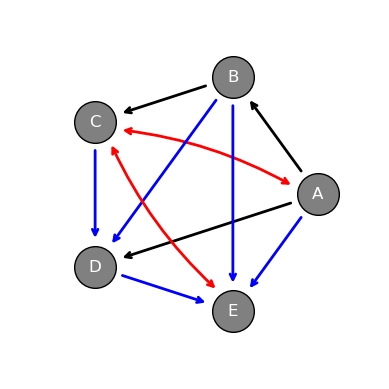

In [274]:

# Example usage
connections = gen_true_links(5, seed=1)
for conn in connections:
    print(conn)

plot_true_links(connections, dpi=100)

In [263]:
import numpy as np


def linear_ramp(t, t0=0.0, dt=1.0, y0=0.0, dy=1.0, GS_slope = 0.0, GIS_slope=0.0):
    """Linear Ramp Function

    This function describes the piece-wise linear ramp.

    Parameter
    ---------
    t : np.ndarray
        Time variable
    t0 : float
        Start time of the ramp
    dt : float
        Transition length
    y0 : float
        Function value before the transition
    dy : float
        Hight of the transition
    GS_slope : float
        slope before transition - can be positive or negative
    GIS_slope : float
        slope after transition - can be positive or negative

    Return
    ------
    y : np.ndarray
        Function values of the linear transiton
    """
    lt_t0 = t < t0
    gt_t1 = t > t0 + dt
    condlist = [lt_t0,
                ~np.logical_or(lt_t0, gt_t1),
                gt_t1]
    funclist = [lambda t: y0 + GS_slope * (t - t0),
                lambda t: y0 + dy * (t - t0) / dt,
                lambda t: y0 + dy + GIS_slope * (t - t0 - dt)]
    y = np.piecewise(t, condlist, funclist)
    return y


def sample_ar1(n, alpha, sigma=1.0, x0=0):
    """Generate AR(1) noise for evenely sampled series"""
    x = np.zeros(n)
    x[0] = x0 + sigma * np.random.randn()
    sigma_e = np.sqrt(sigma ** 2 * (1 - alpha ** 2))
    for i in range(1, n):
        x[i] = alpha * x[i - 1] + sigma_e * np.random.randn()
    return x


import numpy as np
import pandas as pd


def dummy_single_time_order(length, lag=0, causal_strength=1,  delta=10.0, t0=800.0, dt=50.0, dy=1.0, GS_slope=5e-4, GIS_slope=-1e-3, tau=1.0, sigma=0.05):
    """
    Generate dummy time series data for demonstration purposes.

    Args:
    length (int): Length of the time series data.
    delta (float): Time step.
    t0 (float): Starting time.
    dt (float): Duration of the transition.
    dy (float): Amplitude of the transition.
    GS_slope (float): Slope of the Gaussian-shaped transition.
    GIS_slope (float): Slope of the Glacial-interglacial-shaped transition.
    causal_strength (float): Strength of the causal link.
    sigma (float): Standard deviation of the noise.
    tau (float): Time constant for the autoregressive process.

    Returns:
    pandas.DataFrame: DataFrame containing dummy time series data.
    """
    alpha = np.exp(-delta / tau)
    # time = np.arange(t0, t0 + length * delta, step=delta, dtype='float')
    time = np.arange(length, step=delta, dtype='float')
    trans_A = linear_ramp(time, t0=t0, dt=dt, y0=0.0, dy=dy, GS_slope=GS_slope, GIS_slope=GIS_slope)
    noise_A = sample_ar1(len(time), alpha=alpha, sigma=sigma, x0=0)
    synt_trans_A = trans_A + noise_A


    if lag > 0:
        trans_B = np.full_like(trans_A, np.nan)
        trans_B[:-lag] = trans_A[lag:]
    if lag < 0:
        trans_B = np.full_like(trans_A, np.nan)
        trans_B[-lag:] = trans_A[:lag]
    if lag == 0:
        trans_B=trans_A

    noise_B = sample_ar1(len(trans_B), alpha=alpha, sigma=sigma, x0=0)

    # Combine the lagged original series with the new AR(1) series to produce the causally linked series
    synt_trans_B = noise_B + causal_strength * trans_B


    df = pd.DataFrame({
        'time': time,
        'A': synt_trans_A,
        'B': synt_trans_B
    })

    # drop rows with nan
    df = df.dropna()
    
    return df


def dummy_single_time_order_v2(length, lag=0, causal_strength=1,  delta=10.0, t0=800.0, dt=50.0, dy=1.0, GS_slope=5e-4, GIS_slope=-1e-3, tau=1.0, sigma=0.05):
    """
    Generate dummy time series data for demonstration purposes.

    Args:
    length (int): Length of the time series data.
    delta (float): Time step.
    t0 (float): Starting time.
    dt (float): Duration of the transition.
    dy (float): Amplitude of the transition.
    GS_slope (float): Slope of the Gaussian-shaped transition.
    GIS_slope (float): Slope of the Glacial-interglacial-shaped transition.
    causal_strength (float): Strength of the causal link.
    sigma (float): Standard deviation of the noise.
    tau (float): Time constant for the autoregressive process.

    Returns:
    pandas.DataFrame: DataFrame containing dummy time series data.
    """
    alpha = np.exp(-delta / tau)
    # time = np.arange(t0, t0 + length * delta, step=delta, dtype='float')
    time = np.arange(length, step=delta, dtype='float')
    trans_A = linear_ramp(time, t0=t0, dt=dt, y0=0.0, dy=dy, GS_slope=GS_slope, GIS_slope=GIS_slope)
    noise_A = sample_ar1(len(time), alpha=alpha, sigma=sigma, x0=0)
    synt_trans_A = trans_A + noise_A


    trans_B=trans_A

    sigma_e = np.sqrt(sigma ** 2 * (1 - alpha ** 2))

    noise_B = np.zeros(len(time))

    if lag > 0:
        print('lag has to be negative')
    else:
        for t in range(1, len(time)+lag):
            noise_B[t] = causal_strength * noise_A[t-lag] +sigma_e* np.random.randn()
    


    # Combine the lagged original series with the new AR(1) series to produce the causally linked series
    synt_trans_B = noise_B + trans_B


    df = pd.DataFrame({
        'time': time,
        'A': synt_trans_A,
        'B': synt_trans_B
    })
    
    # drop rows with nan
    df = df.dropna()
    
    return df




def dummy_single_instant(length, causal_strength=1,  delta=10.0, t0=800.0, dt=50.0, dy=1.0, GS_slope=5e-4, GIS_slope=-1e-3, tau=1.0, sigma=0.05):
    """
    Generate dummy time series data for demonstration purposes.

    Args:
    length (int): Length of the time series data.
    delta (float): Time step.
    t0 (float): Starting time.
    dt (float): Duration of the transition.
    dy (float): Amplitude of the transition.
    GS_slope (float): Slope of the Gaussian-shaped transition.
    GIS_slope (float): Slope of the Glacial-interglacial-shaped transition.
    causal_strength (float): Strength of the causal link.
    sigma (float): Standard deviation of the noise.
    tau (float): Time constant for the autoregressive process.

    Returns:
    pandas.DataFrame: DataFrame containing dummy time series data.
    """
    alpha = np.exp(-delta / tau)
    # time = np.arange(t0, t0 + length * delta, step=delta, dtype='float')
    time = np.arange(length, step=delta, dtype='float')
    trans_A = linear_ramp(time, t0=t0, dt=dt, y0=0.0, dy=dy, GS_slope=GS_slope, GIS_slope=GIS_slope)
    noise_A = sample_ar1(len(time), alpha=alpha, sigma=sigma, x0=0)
    synt_trans_A = trans_A + noise_A


    trans_B=trans_A

    sigma_e = np.sqrt(sigma ** 2 * (1 - alpha ** 2))

    noise_B = np.zeros(len(time))

    for t in range(1, len(time)):
        noise_B[t] = causal_strength * noise_A[t] +sigma_e* np.random.randn()
    


    # Combine the lagged original series with the new AR(1) series to produce the causally linked series
    synt_trans_B = noise_B + trans_B


    df = pd.DataFrame({
        'time': time,
        'A': synt_trans_A,
        'B': synt_trans_B
    })
    
    # drop rows with nan
    df = df.dropna()
    
    return df





import numpy as np
import pandas as pd

def dummy_bi(length, beta=0.3, lag=1, delta=10.0, t0=800.0, dt=50.0, dy=1.0, GS_slope=5e-4, GIS_slope=-1e-3, tau=1.0, sigma=0.05):
    """
    Generate time series data demonstrating bi-directional causality.
    
    Args:

    Returns:
    pandas.DataFrame: DataFrame containing bi-directionally linked synthetic data.
    """
    time = np.arange(length, step=delta, dtype='float')
    A = np.zeros(len(time))
    B = np.zeros(len(time))

    A[0] = np.random.normal(0, sigma)
    B[0] = np.random.normal(0, sigma)

    alpha = np.exp(-delta / tau)
    sigma_e = np.sqrt(sigma ** 2 * (1 - alpha ** 2))

    if lag > 0:
        print('lag has to be negative')
    else:    
        for t in range(1, len(time)+lag):
            A[t] = alpha * A[t-1] + beta * B[t+lag] + sigma_e* np.random.randn()
            B[t] = alpha * B[t-1] + beta * A[t+lag] + sigma_e* np.random.randn()

    
    trans_A = linear_ramp(time, t0=t0, dt=dt, y0=0.0, dy=dy, GS_slope=GS_slope, GIS_slope=GIS_slope)

    trans_B = trans_A


    A=trans_A+A
    B=trans_B+B
    
    df = pd.DataFrame({
        'time': time,
        'A': A,
        'B': B
    })

    # drop rows with nan
    df = df.dropna()    

    return df



# Test for single way causality

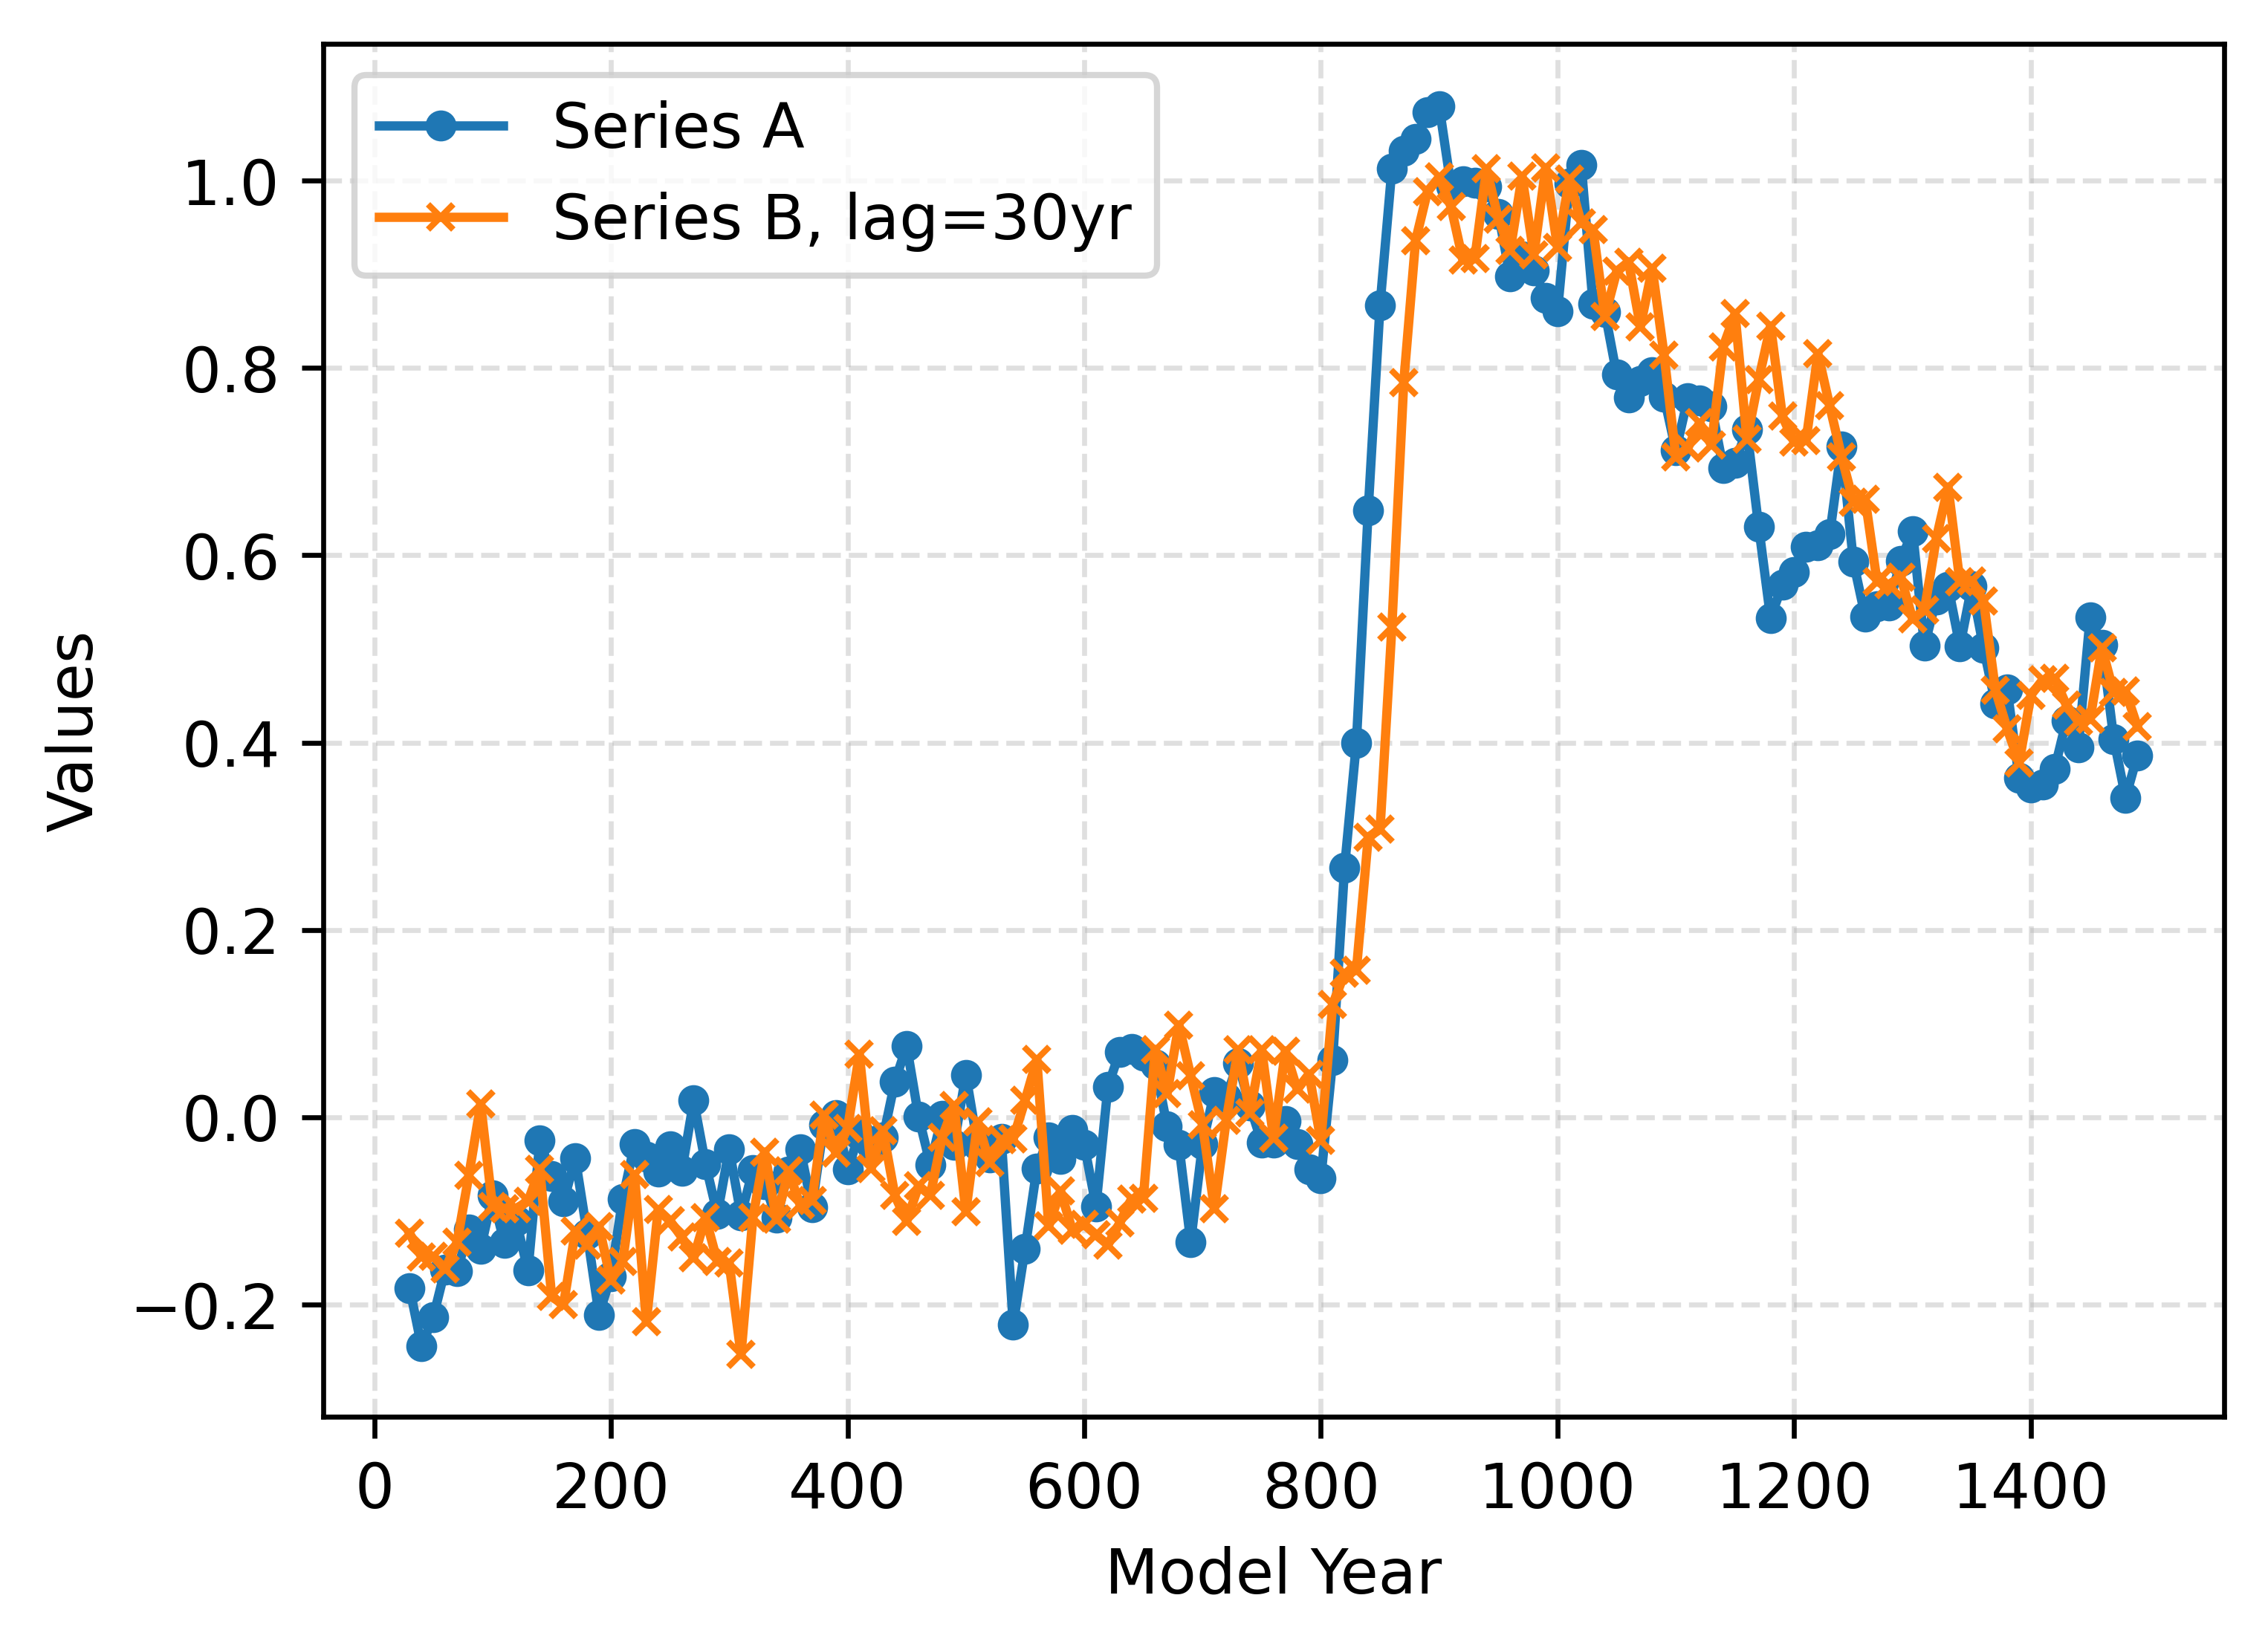

In [242]:
import matplotlib.pyplot as plt


lag=-3
data = dummy_single_time_order(length=1500, causal_strength=1, lag=lag, delta=10.0, t0=800.0, dt=56.32925780771254, dy=1.0, GS_slope=0.00016431508734689263, GIS_slope=-0.0009404944834246113, sigma=0.06633234778696487, tau=13.649751415738818)

# Enhance the plot
plt.figure(figsize=(5.5, 4),dpi=600)  # Adjust the figure size
plt.plot(data['time'], data['A'], label='Series A', linestyle='-', marker='o', markersize=4)
plt.plot(data['time'], data['B'], label=f'Series B, lag={lag*-10}yr', linestyle='-', marker='x', markersize=4)

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.4)
# plt.title('Time Series of Dummy Warming Data')
plt.xlabel('Model Year')
plt.ylabel('Values')

# Add legend
plt.legend()

plt.show()

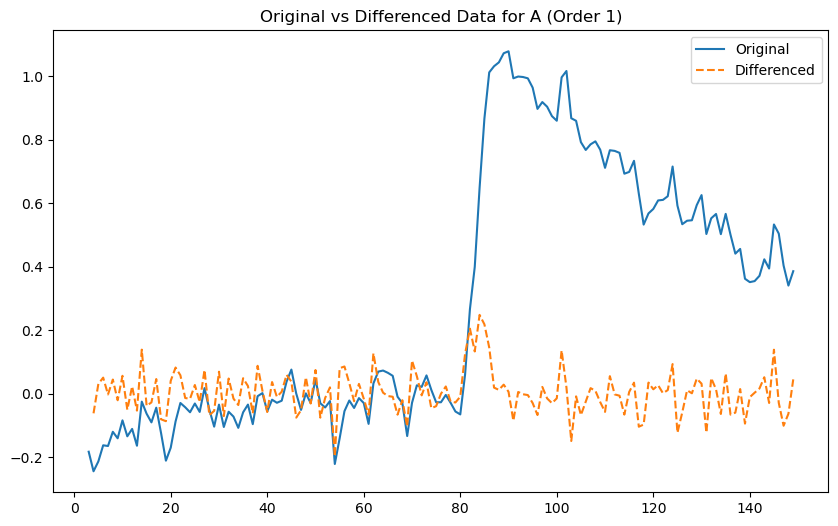

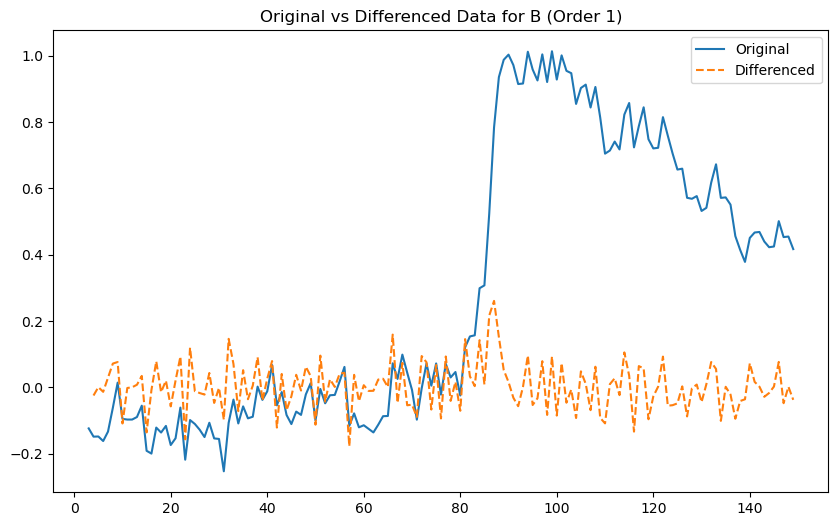

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
A => B    7.701               0.000                5                True
B => A    0.476               0.492                1                False



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


'Granger Causality Test\n------------------------------------------------------------\nDirection                   F-statistics         p-value         lag         Granger cause\nA => B    7.701               0.000                5                True\nB => A    0.476               0.492                1                False\n'

In [245]:
from toolbox import GC_functions as GC
import importlib
importlib.reload(GC)

data_checked = GC.make_stationary(data,['A', 'B'], test_method='ADF', plot=True)
GC.gc_test(data_checked, 'A','B', max_lags=10)

# Test for single way causality, V2

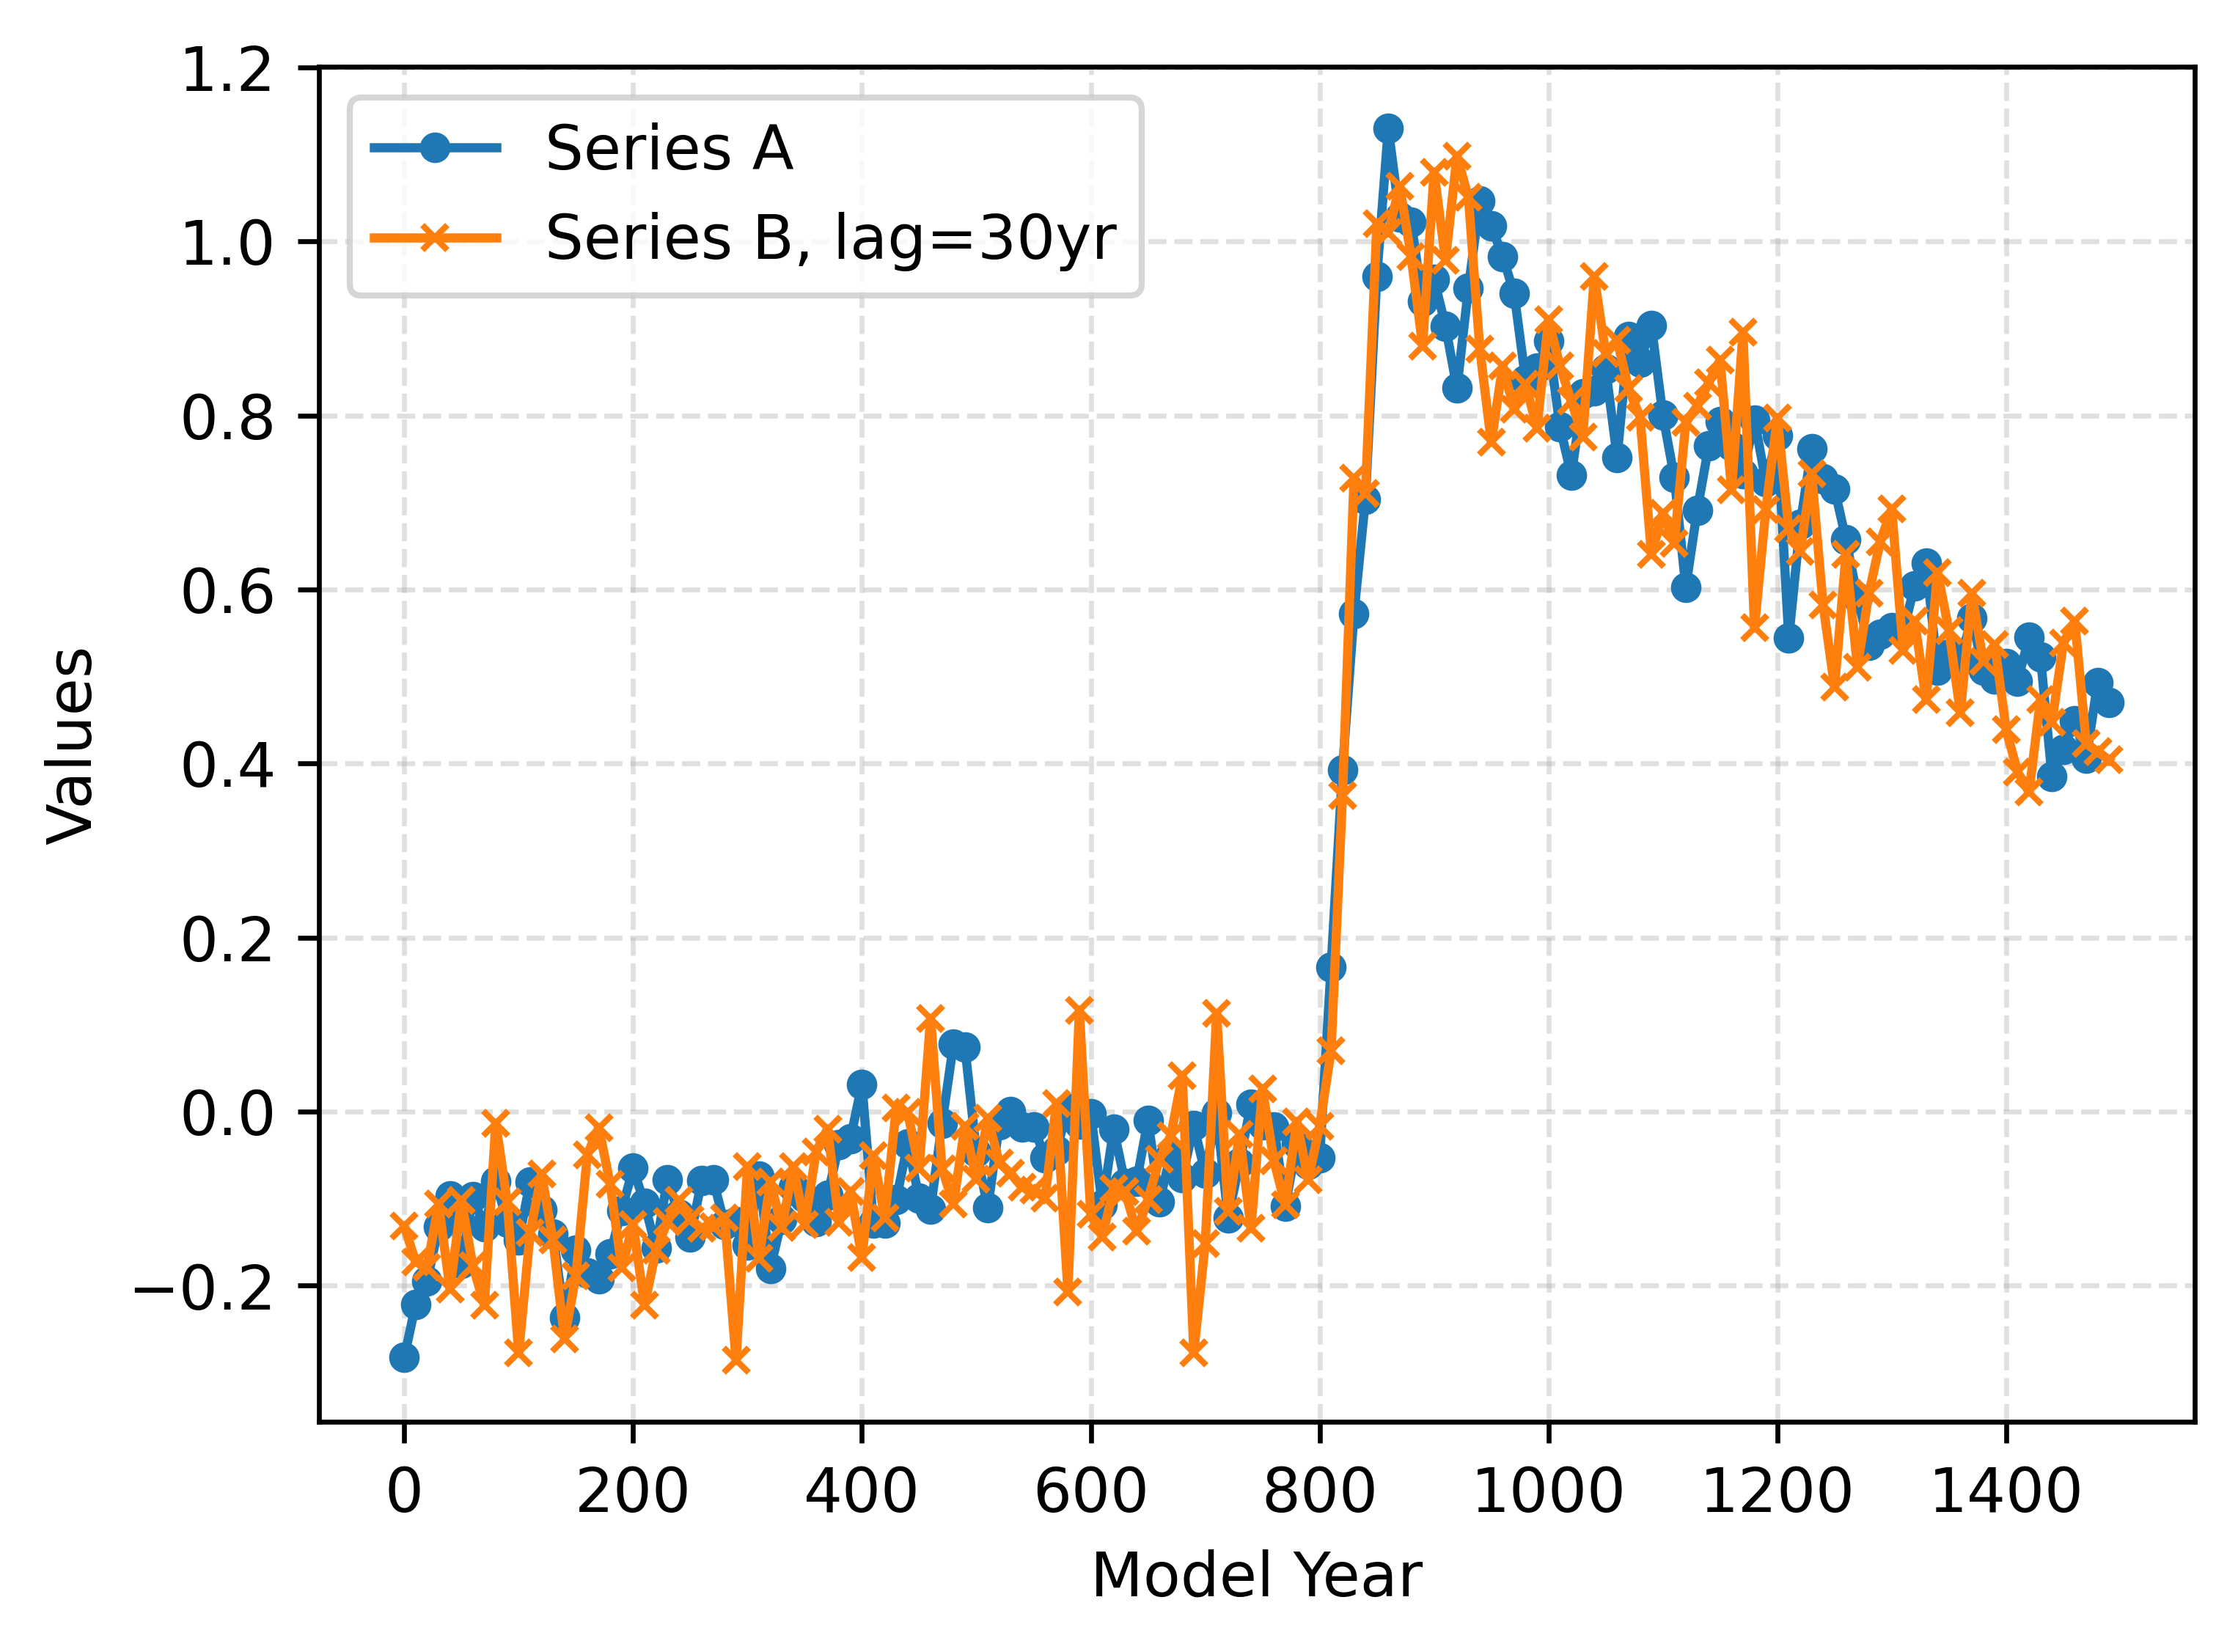

In [252]:
import matplotlib.pyplot as plt


lag=-3
data = dummy_single_time_order_v2(length=1500, causal_strength=1, lag=lag, delta=10.0, t0=800.0, dt=56.32925780771254, dy=1.0, GS_slope=0.00016431508734689263, GIS_slope=-0.0009404944834246113, sigma=0.06633234778696487, tau=13.649751415738818)

# Enhance the plot
plt.figure(figsize=(5.5, 4),dpi=600)  # Adjust the figure size
plt.plot(data['time'], data['A'], label='Series A', linestyle='-', marker='o', markersize=4)
plt.plot(data['time'], data['B'], label=f'Series B, lag={lag*-10}yr', linestyle='-', marker='x', markersize=4)

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.4)
# plt.title('Time Series of Dummy Warming Data')
plt.xlabel('Model Year')
plt.ylabel('Values')

# Add legend
plt.legend()

plt.show()

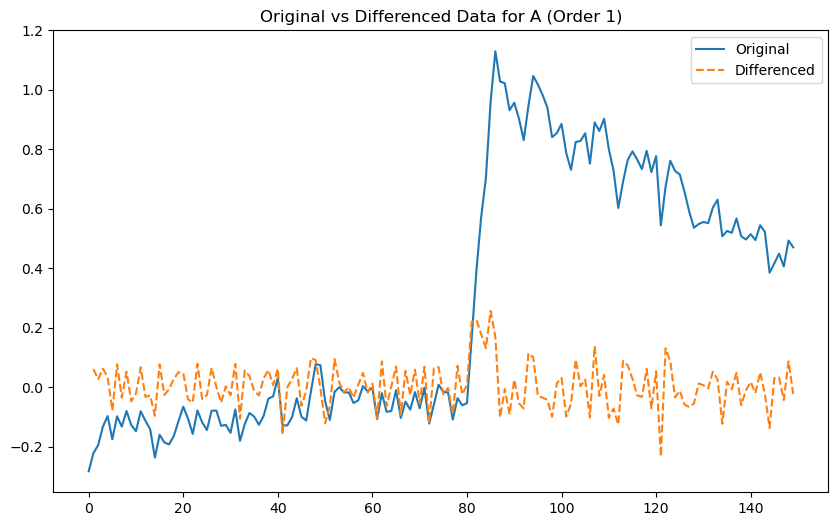

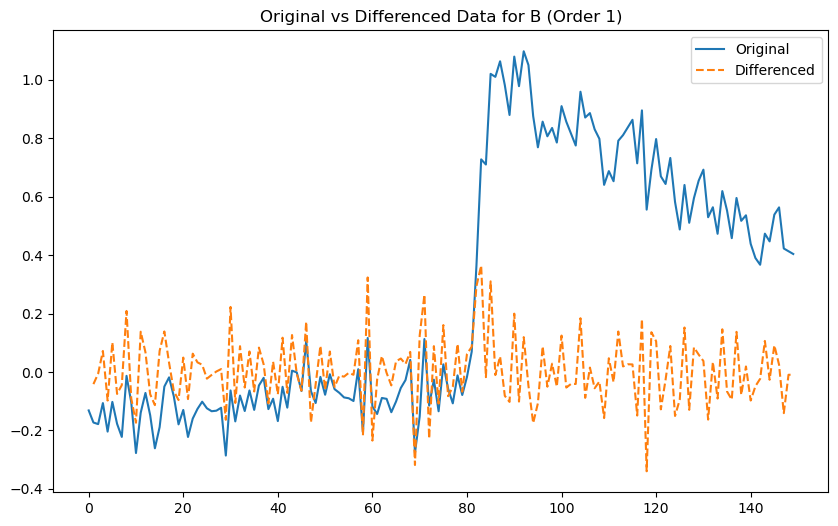

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
A => B    4.319               0.000                7                True
B => A    35.706               0.000                3                True



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


'Granger Causality Test\n------------------------------------------------------------\nDirection                   F-statistics         p-value         lag         Granger cause\nA => B    4.319               0.000                7                True\nB => A    35.706               0.000                3                True\n'

In [254]:
from toolbox import GC_functions as GC
import importlib
importlib.reload(GC)

data_checked = GC.make_stationary(data,['A', 'B'], test_method='ADF', plot=True)
GC.gc_test(data_checked, 'A','B', max_lags=10)

# Test for instant causality

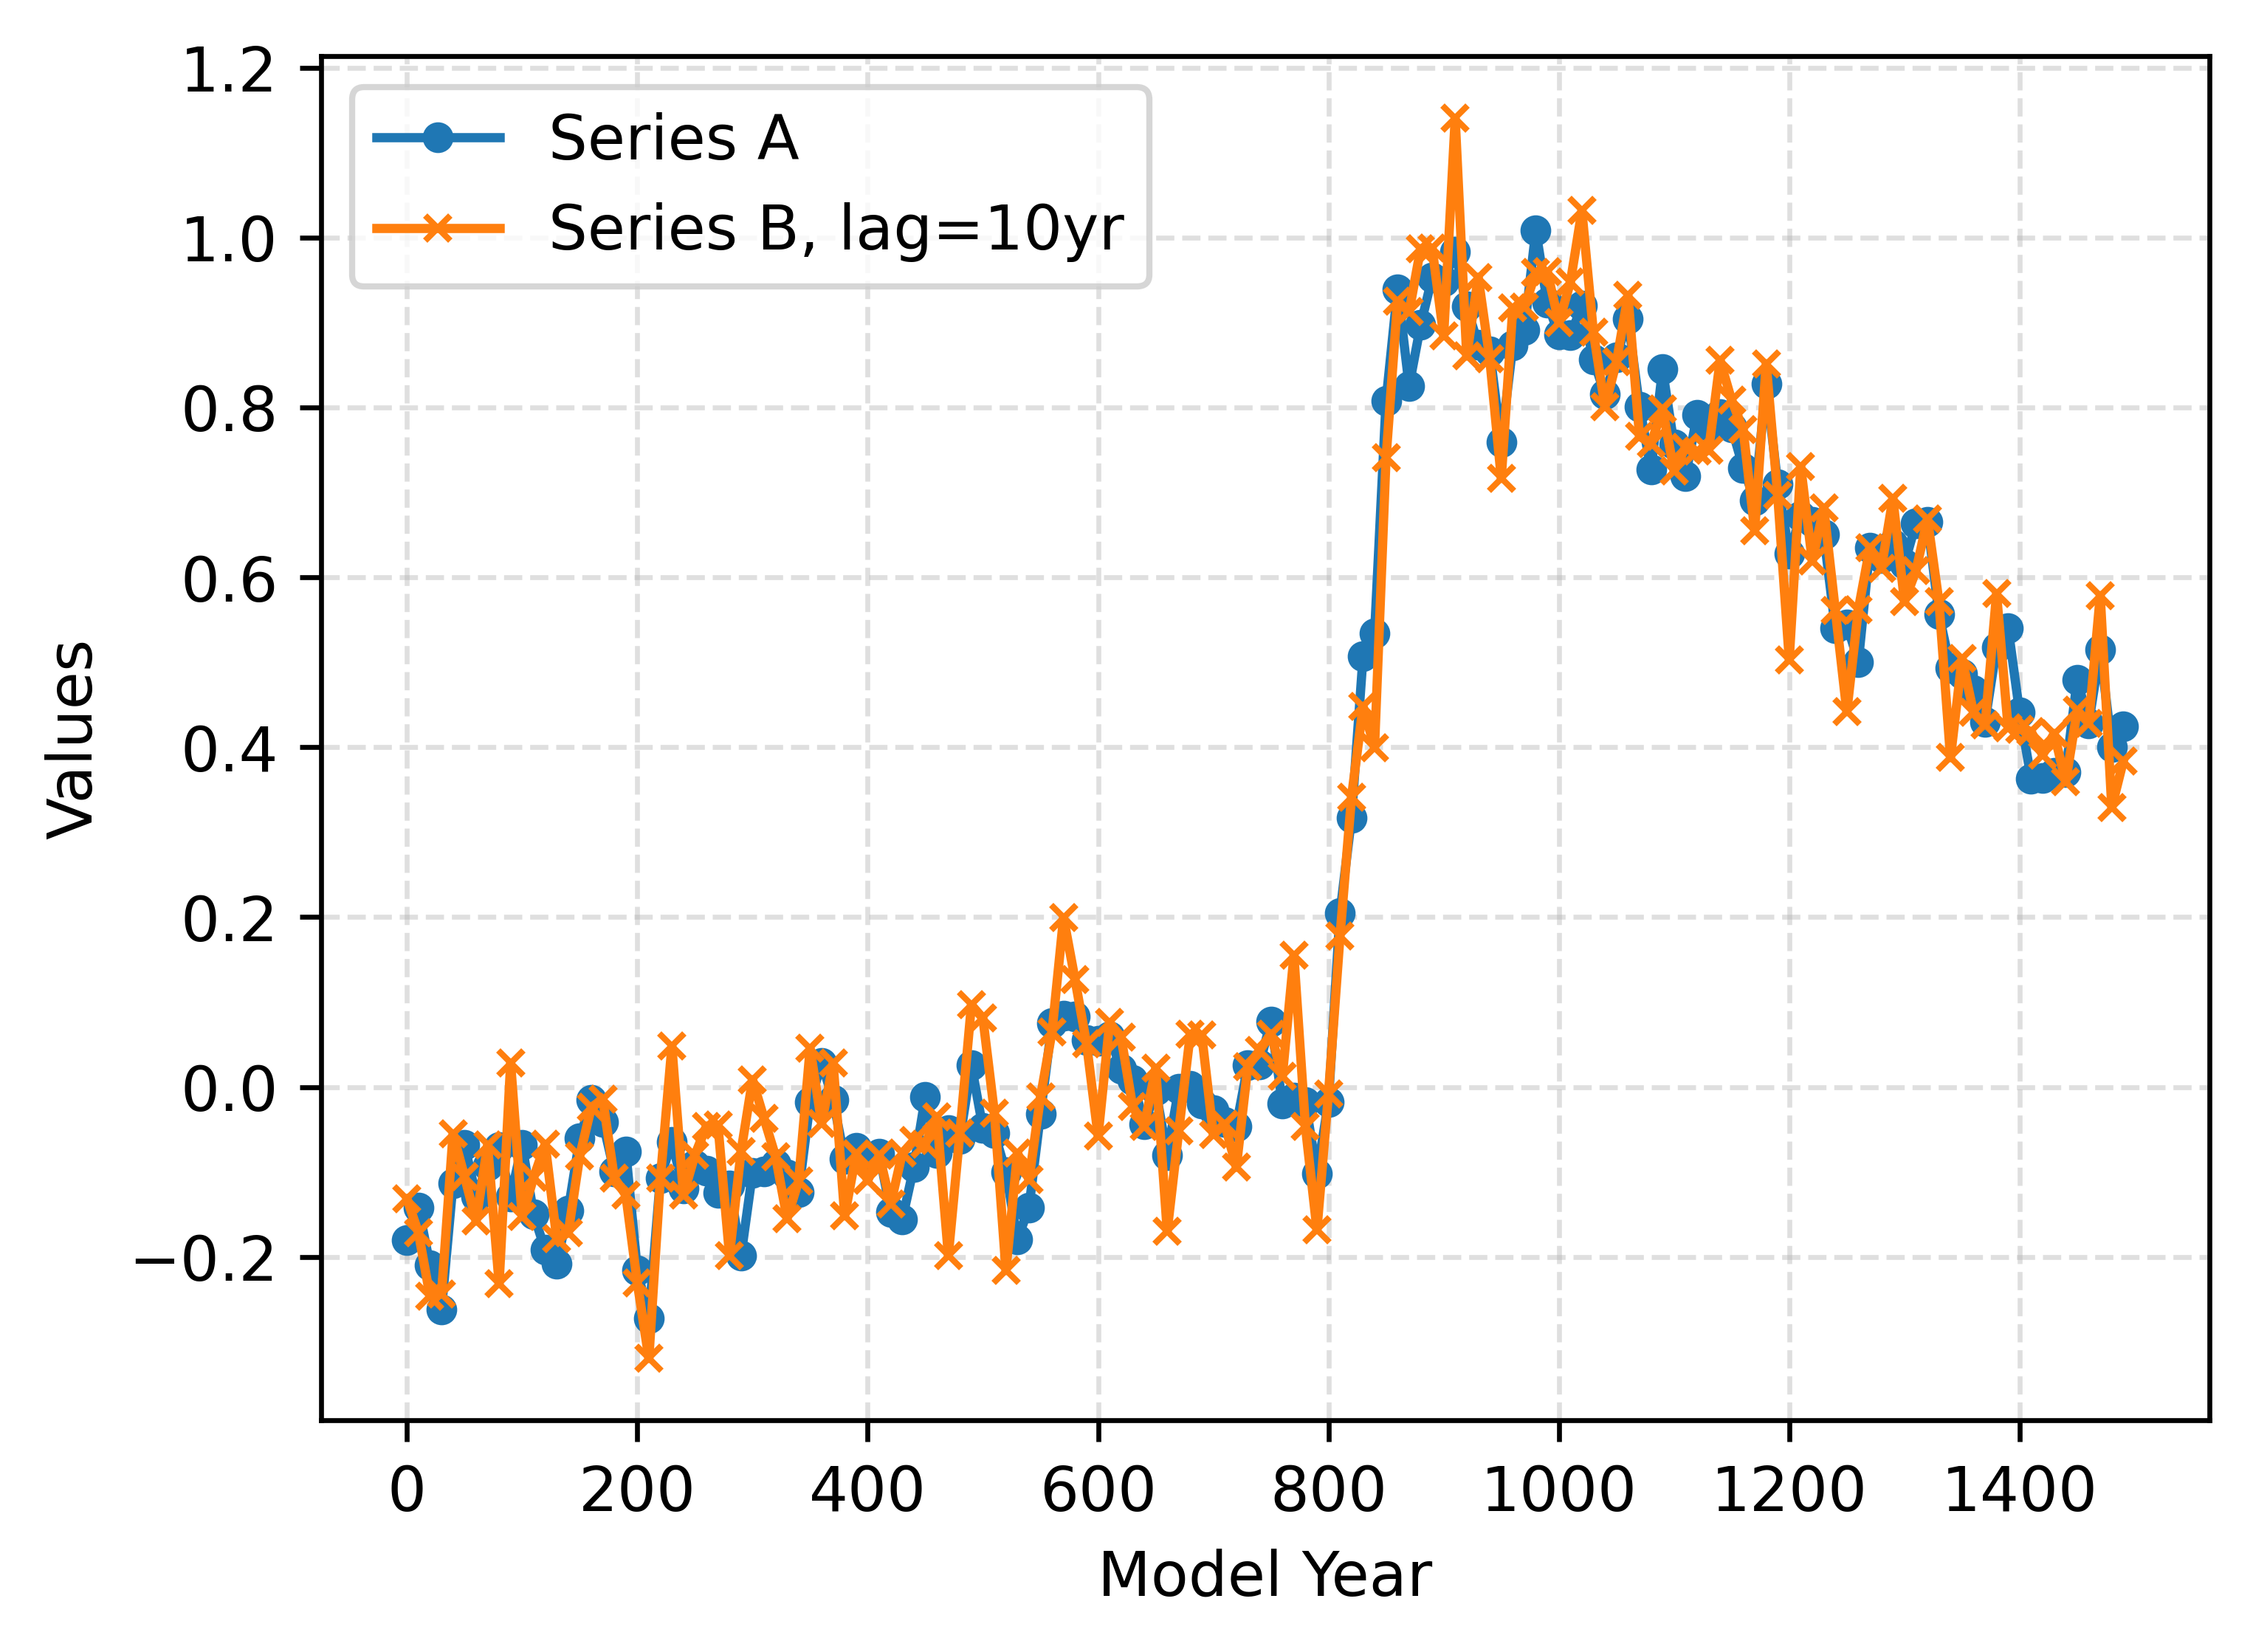

In [268]:
import matplotlib.pyplot as plt


data = dummy_single_instant(length=1500, causal_strength=1, delta=10.0, t0=800.0, dt=56.32925780771254, dy=1.0, GS_slope=0.00016431508734689263, GIS_slope=-0.0009404944834246113, sigma=0.06633234778696487, tau=13.649751415738818)

# Enhance the plot
plt.figure(figsize=(5.5, 4),dpi=600)  # Adjust the figure size
plt.plot(data['time'], data['A'], label='Series A', linestyle='-', marker='o', markersize=4)
plt.plot(data['time'], data['B'], label=f'Series B, lag={lag*-10}yr', linestyle='-', marker='x', markersize=4)

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.4)
# plt.title('Time Series of Dummy Warming Data')
plt.xlabel('Model Year')
plt.ylabel('Values')

# Add legend
plt.legend()

plt.show()

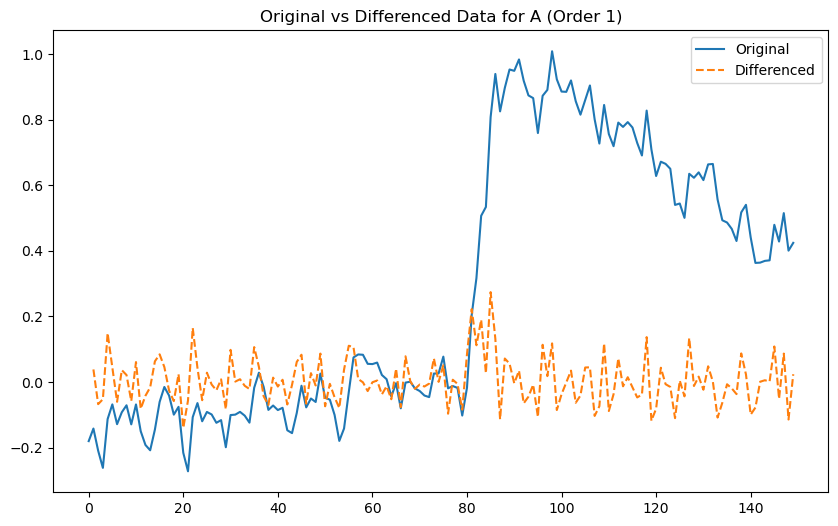

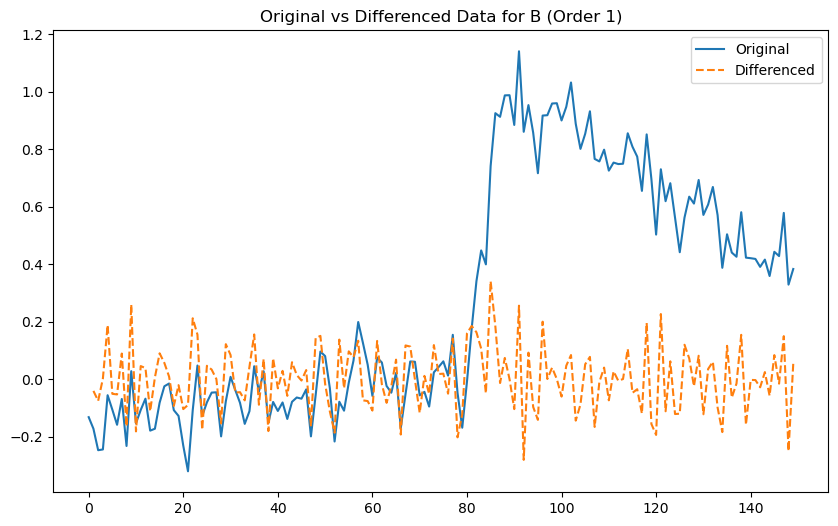

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
A => B    10.132               0.000                5                True
B => A    2.813               0.096                1                False



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


'Granger Causality Test\n------------------------------------------------------------\nDirection                   F-statistics         p-value         lag         Granger cause\nA => B    10.132               0.000                5                True\nB => A    2.813               0.096                1                False\n'

In [269]:
from toolbox import GC_functions as GC
import importlib
importlib.reload(GC)

data_checked = GC.make_stationary(data,['A', 'B'], test_method='ADF', plot=True)
GC.gc_test(data_checked, 'A','B', max_lags=10)

# Test for bi-directional causality

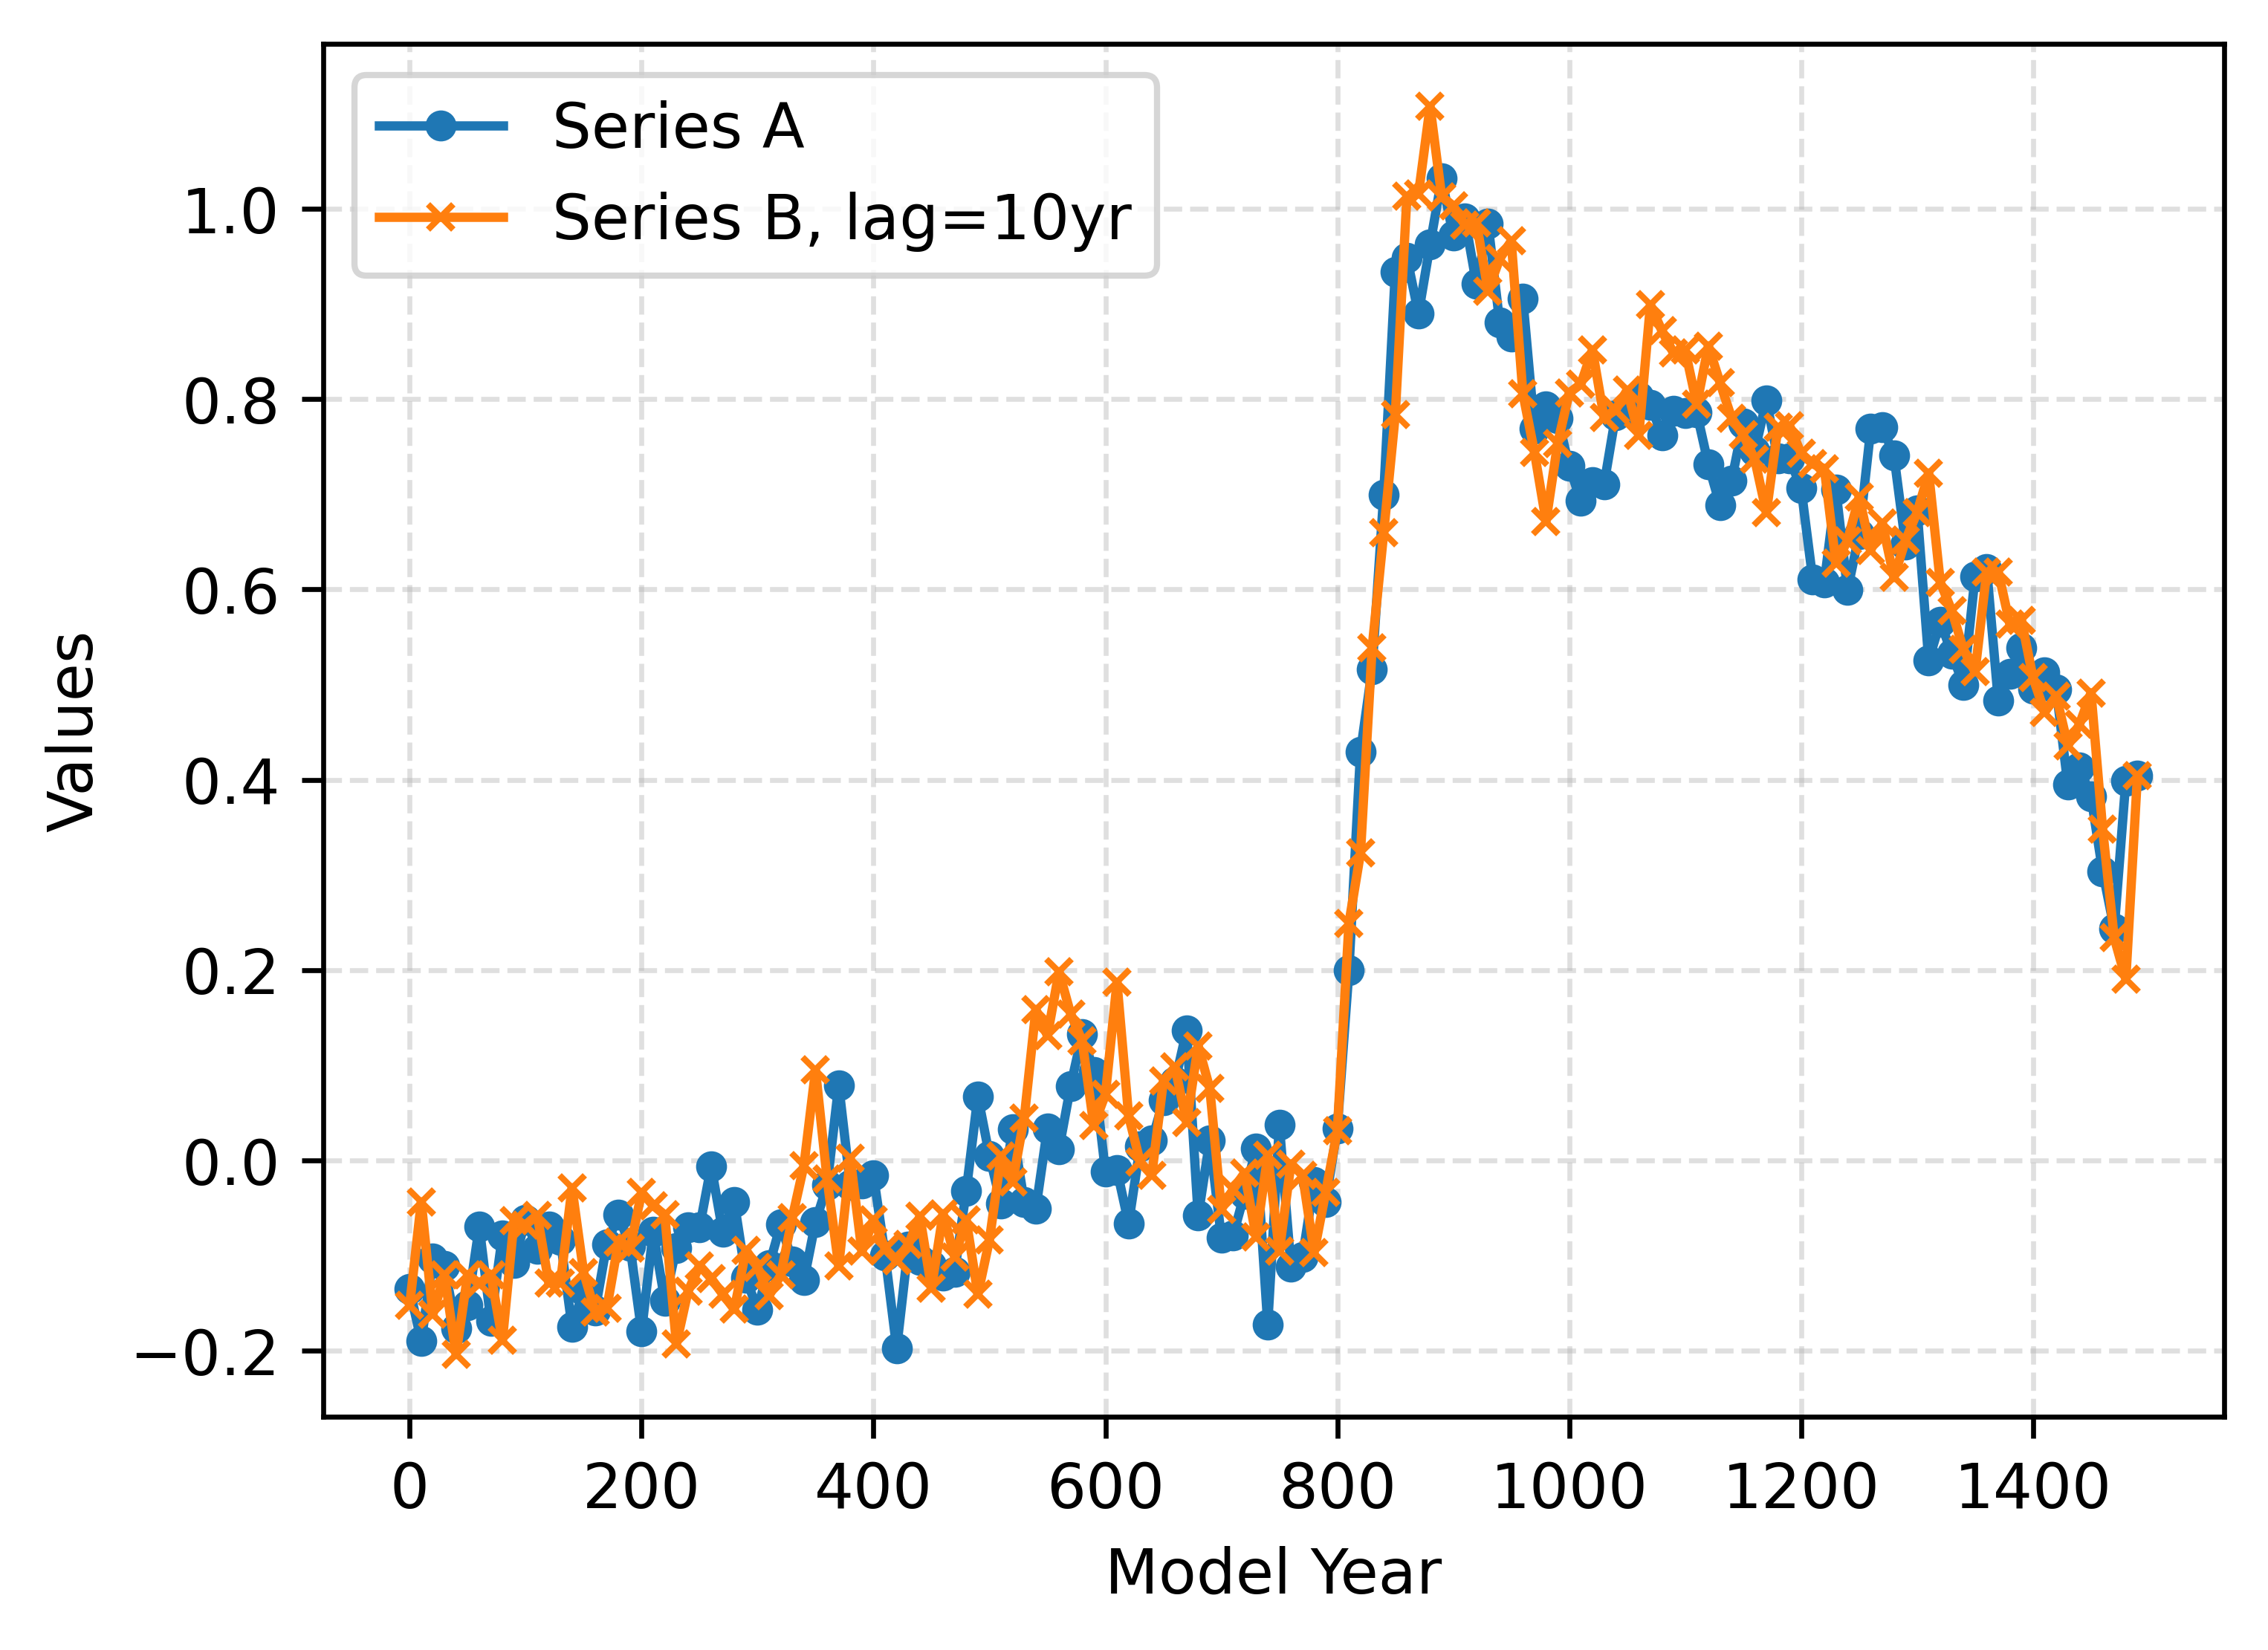

In [261]:
import matplotlib.pyplot as plt


lag=-1
data = dummy_bi(length=1500, beta=0.3, lag=lag, delta=10.0, t0=800.0, dt=56.32925780771254, dy=1.0, GS_slope=0.00016431508734689263, GIS_slope=-0.0009404944834246113, sigma=0.06633234778696487, tau=13.649751415738818)

# Enhance the plot
plt.figure(figsize=(5.5, 4),dpi=600)  # Adjust the figure size
plt.plot(data['time'], data['A'], label='Series A', linestyle='-', marker='o', markersize=4)
plt.plot(data['time'], data['B'], label=f'Series B, lag={lag*-10}yr', linestyle='-', marker='x', markersize=4)

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.4)
# plt.title('Time Series of Dummy Warming Data')
plt.xlabel('Model Year')
plt.ylabel('Values')

# Add legend
plt.legend()

plt.show()

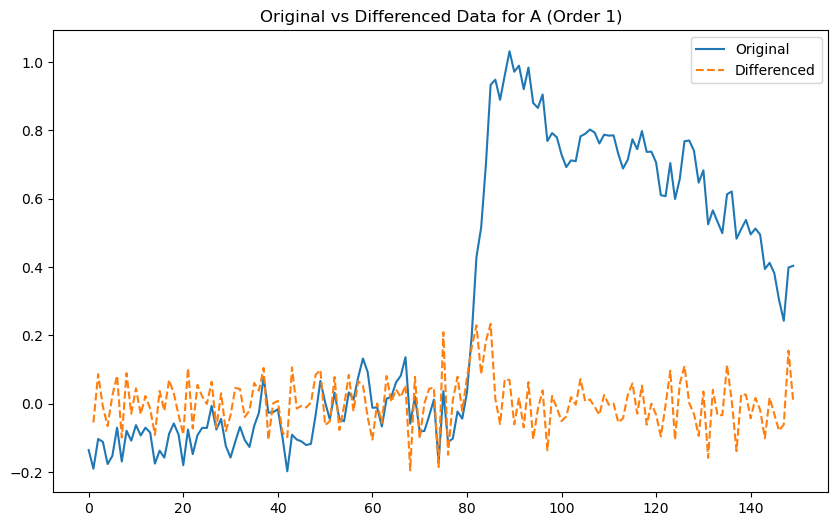

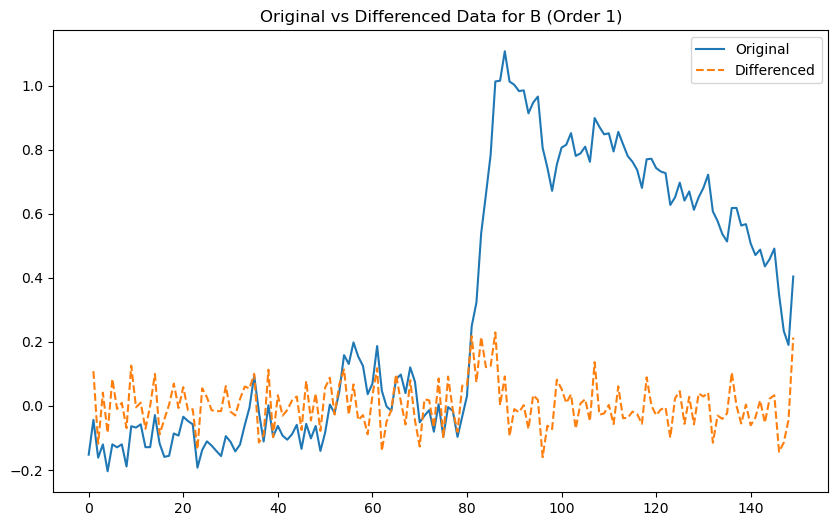

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
A => B    15.615               0.000                4                True
B => A    5.219               0.000                7                True



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


'Granger Causality Test\n------------------------------------------------------------\nDirection                   F-statistics         p-value         lag         Granger cause\nA => B    15.615               0.000                4                True\nB => A    5.219               0.000                7                True\n'

In [262]:
from toolbox import GC_functions as GC
import importlib
importlib.reload(GC)

data_checked = GC.make_stationary(data,['A', 'B'], test_method='ADF', plot=True)
GC.gc_test(data_checked, 'A','B', max_lags=10)